# Training NN models:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.cluster import MiniBatchKMeans
import joblib
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from DataGenerator import DataGenerator_Sup

Using TensorFlow backend.


Get a list of all files:

In [2]:
Ad_folder = '../Data/audio_ads' # audion files location

pos_files = []
for r,d,f in os.walk(Ad_folder):
    for filename in f:
        if '.mp3' in filename:
            pos_files.append(os.path.join(Ad_folder,filename))

Music_folder = '../Data/Music' # audion files location

neg_files = []
for r,d,f in os.walk(Music_folder):
    for filename in f:
        if '.mp3' in filename:
            neg_files.append(os.path.join(Music_folder,filename))

How many mp3 files do we have?

In [3]:
n_pos_files = len(pos_files)
n_neg_files = len(neg_files)

print('We have ' + str(n_pos_files) + ' positive examples')
print('We have ' + str(n_neg_files) + ' negative examples')

We have 2303 positive examples
We have 23 negative examples


### Define utility functions:

In [4]:
def create_model(n_features):
    '''Create a model obejct with an input of length n_features'''
    model = Sequential() # create a model instance

    #add model layers
    model.add(Dense(256, activation = 'relu', input_shape=(n_features,)))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model

### Create data generators:

In [5]:
train_size = 0.8 # the fraction of the data used for training 
pos_fraction = 0.01 # the fraction of positives used in training

n_train_pos = int(np.floor(pos_fraction*n_pos_files*train_size))
n_train_neg = int(np.floor(n_neg_files*train_size))
train_files_pos = pos_files[:n_train_pos]
train_files_neg = neg_files[:n_train_neg]
test_files_pos = pos_files[n_train_pos:]
test_files_neg = neg_files[n_train_neg:]

train_generator = DataGenerator_Sup(train_files_pos, train_files_neg, dataset='train')
test_generator = DataGenerator_Sup(test_files_pos, test_files_neg, dataset='test')

Check generators:

In [6]:
if 1:
    X, Y = train_generator.__getitem__(0) # get item
    print(X.shape)
    print(Y.shape)

(122, 1690)
(122, 1)


### Train NN model:

Create and compile model:

In [7]:
model = create_model(X.shape[1])
filepath = 'weights_1690_256_64_1'
checkpoint = ModelCheckpoint(filepath)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Train model:

In [8]:
H = model.fit_generator(generator = train_generator, epochs = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
3/3 [==============================] - 45s 15s/step - loss: 0.8636 - acc: 0.6131
Epoch 2/10
3/3 [==============================] - 41s 14s/step - loss: 0.4679 - acc: 0.8194
Epoch 3/10
3/3 [==============================] - 42s 14s/step - loss: 0.5581 - acc: 0.7539
Epoch 4/10
3/3 [==============================] - 42s 14s/step - loss: 0.3063 - acc: 0.8641
Epoch 5/10
3/3 [==============================] - 46s 15s/step - loss: 0.1870 - acc: 0.9289
Epoch 6/10
3/3 [==============================] - 43s 14s/step - loss: 0.0891 - acc: 0.9704
Epoch 7/10
3/3 [==============================] - 44s 15s/step - loss: 0.1886 - acc: 0.9360
Epoch 8/10
3/3 [==============================] - 44s 15s/step - loss: 0.0973 - acc: 0.9704
Epoch 9/10
3/3 [==============================] - 46s 15s/step - loss: 0.0817 - acc: 0.9821
Epoch 10/10
3/3 [==============================] - 44s 15s/step - loss: 0.0543 - acc: 0.9965


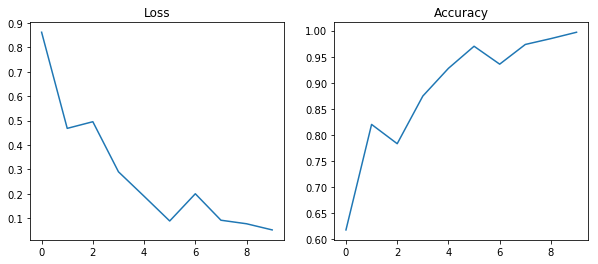

In [9]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.plot(H.history['loss'])
plt.title('Loss')
plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(H.history['acc'])

In [ ]:
# Error files:
train_generatorerator.err_files

### Check Accuracy: